In [1]:
%matplotlib inline

import itertools as itt
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
from md_distance import md_distance
from refframes import refframe_switch1
from refframes import refframe_switch2

In [2]:
source = 'carbon'
run = 'run4'
if source == 'vreede':
    current_dir = '/home/sanderroet/Ras-JV/'+run+'/analysis/'
    name = 'vreede_'+run
elif source == 'carbon':
    current_dir = '/home/sanderroet/carbon/kras_100ns/'+run+'/analysis/'
    name = 'carbon_'+run
xtc = current_dir + 'vis-md.xtc'
pdb = current_dir + 'vis-md.pdb'

In [4]:
%%time
trj = md.load(xtc, top = pdb)
#reference = md.load(test_pdb)

CPU times: user 17 s, sys: 3.82 s, total: 20.9 s
Wall time: 26.8 s


In [5]:
%%time
topology = trj.topology
G60 = topology.select('protein and (resSeq 60 or resSeq 63)')
gly60 = topology.select('protein and (resSeq 60) ')#and not name H')
gly12 = topology.select('protein and (resSeq 12)' )#and not name H')
glu63 = topology.select('protein and (resSeq 63) and name CG')#not backbone and element O and not name H and not name O')
glu62 = topology.select('protein and (resSeq 62) and name CG')#not backbone and element O and not name H and not name O')
glu37 = topology.select('protein and (resSeq 37) and not backbone and not name H')


D33 = topology.select('protein and resSeq 33 and element O and not name O')
asp30 = topology.select('protein and resSeq 30')
his27 = topology.select('protein and resSeq 27')
GTP = topology.select('((resname GTP) and not element H) or element Mg')
GTP_sugar= topology.select('resname GTP and (name =~ "O[2-3]\'")')
MG = topology.select('element Mg')
switch1 = topology.select('protein and(resSeq 30 to 38)')# and not name H')
switch2 = topology.select('protein and(resSeq 61 to 66)')
gln61 = topology.select('protein and resSeq 61 and not backbone and not name H')
res69 = topology.select('protein and resSeq 69 and not name H')
res102 = topology.select('protein and resSeq 102 and not name H')
lys16 = topology.select('protein and resSeq 16 and not backbone and not name H')
tyr96 = topology.select('protein and resSeq 96 and not backbone and not name H')
ala11 = topology.select('protein and resSeq 11 and not backbone and not name H')
arg73 = topology.select('protein and resSeq 73 and not backbone and not name H')
asp105 = topology.select('protein and resSeq 105 and not backbone and not name H')
thr74 = topology.select('protein and resSeq 74 and not backbone and not name H')
val7 = topology.select('protein and resSeq 7 and not backbone and not name H')
arg68 = topology.select('protein and resSeq 68 and name O')
met72 = topology.select('protein and resSeq 72 and name H')
print glu62

[940]
CPU times: user 608 ms, sys: 9.13 ms, total: 617 ms
Wall time: 633 ms


In [5]:
pairs = [
         [gly60,gly12],
         [arg68,met72],
         [gln61,gly12],
         [glu63,GTP],
         [glu62,GTP]
        ]
pair_list = []
new_pair_list = []
for i in pairs:
    new_pair_list.append(list(itt.product(i[0],i[1])))
    #print(new_pair_list)
results_dist = []
for i, e in enumerate(new_pair_list):
    results_dist.extend(md_distance(trj, e , mode = 'min'))
min_total = [[]]
for i, e in enumerate(results_dist[0]):
    temp = []
    for j, e in enumerate(results_dist):
        temp.append(results_dist[j][i])
#    print(temp)
    min_total[0].append(min(temp))


In [6]:
GTP = topology.select('resname GTP or element Mg')
test = topology.select('(resname GTP or element Mg) or (protein and resSeq 60 to 76)')
gtp_trj = trj.atom_slice(GTP)
switch2_trj = trj.atom_slice(switch2)
gtp_center = md.compute_center_of_mass(gtp_trj)
switch2_center = md.compute_center_of_mass(switch2_trj)

print(gtp_center[0])
print(switch2_center[0])
distances = gtp_center - switch2_center
results_COM = []
for i in distances:
    temp = (i[0]**2) + (i[1]**2) + (i[2]**2)
    results_COM.append(temp**(0.5))


[ 4.85118503  4.52399635  2.08145316]
[ 6.35445136  4.62446704  1.78374058]


3
1


<function matplotlib.pyplot.show>

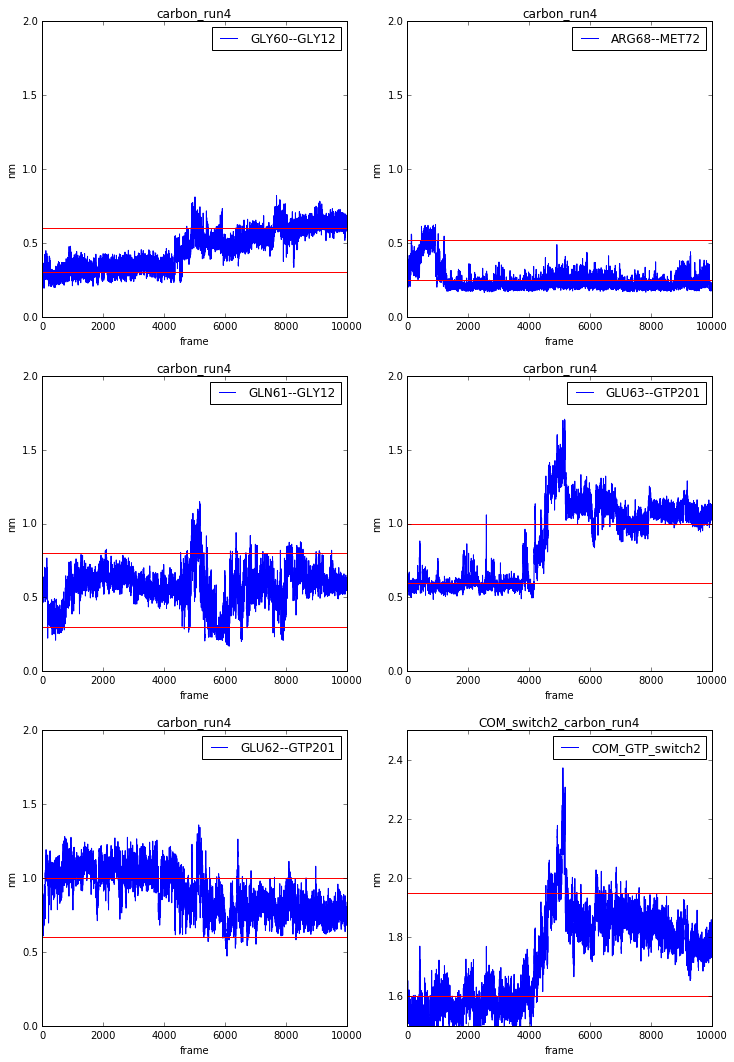

In [7]:
plots = (len(results_dist)+1)/2
if int(plots) != plots:
    plots = int(plots)+1
else:
    plots = int(plots)
fig, axarr = plt.subplots(plots,2, figsize = (12,6*plots))
print(plots)
for i, e in enumerate(results_dist):
    #fig = plt.figure()
    y = e
    x = range(len(e))
    lbl = str(topology.atom(pairs[i][0][0]).residue) + '--' + str(topology.atom(pairs[i][1][0]).residue)    
    start, stop = refframe_switch2[name]
    if plots > 1:
        a = int(i/2)
        b = i-a*2
        axarr[a, b].plot(x,y, label = lbl)

        
        for i, j in enumerate(start):
            x = range(j,stop[i])
            y = e[j:stop[i]]
            axarr[a,b].plot(x,y, c='green')
        x = range(len(e))
#    axarr[a, b].plot([x[0],x[-1]],[0.35,0.35], c='red')
        if lbl == 'GLY60--GLY12':
            refline_open = 0.6 #0.67
            refline_closed = 0.3
        elif lbl == 'ARG68--MET72':
            refline_open = 0.52 #0.5
            refline_closed = 0.25
        elif lbl == 'GLN61--GLY12':
            refline_open = 0.8 #0.85
            refline_closed = 0.3
        elif lbl == 'GLU63--GTP201':
            refline_open = 1.0 #1.0
            refline_closed = 0.6
        elif lbl == 'GLU62--GTP201':
            refline_open = 1.0 #1.15
            refline_closed = 0.6
        else:
            refline_open = 0.5
            refline_closed = 0.5
        axarr[a, b].plot([x[0],x[-1]],[refline_open, refline_open], c='red')
        axarr[a, b].plot([x[0],x[-1]],[refline_closed, refline_closed], c='red')
        axarr[a,b].set_ylim([0.0,2.0])
        axarr[a,b].set_ylabel('nm')
        axarr[a,b].set_xlabel('frame')
        axarr[a,b].set_title(source+'_'+run)
        axarr[a,b].legend()

    else:
        a = i
        axarr[a].plot(x,y, label = lbl)
        for i, j in enumerate(start):
            x = range(j,stop[i])
            y = e[j:stop[i]]
            axarr[a].plot(x,y, c='green')
        x = range(len(e))
        axarr[a].plot([x[0],x[-1]],[0.6,0.6], c='red')
        axarr[a].plot([x[0],x[-1]],[0.5,0.5], c='red')
        axarr[a].set_ylim([0.0,2.0])
        axarr[a].set_ylabel('nm')
        axarr[a].set_xlabel('frame')
        axarr[a].set_title(source+'_'+run)
        axarr[a].legend()

for i, e in enumerate([results_COM]):
    y = e
    x = range(len(e))
    b += 1
    print(b)
    if b >= len(axarr[0]):
        b = 0
        a += 1

    if i == 0:
        lbl = 'COM_GTP_switch2'
        start, stop = refframe_switch2[name]
    axarr[a,b].plot(x,y, label = lbl)
    for i, j in enumerate(start):
        x1 = range(j,stop[i])
        y1 = e[j:stop[i]]
        axarr[a,b].plot(x1,y1, c='green')
    axarr[a,b].plot([x[0],x[-1]],[1.95,1.95], c='red')
    axarr[a,b].plot([x[0],x[-1]],[1.6,1.6], c='red')
    axarr[a,b].set_ylim([1.5,2.5])
    axarr[a,b].set_ylabel('nm')
    axarr[a,b].set_xlabel('frame')
    axarr[a,b].set_title('COM_switch2_'+source+'_'+run)
    axarr[a,b].legend()
fig.savefig(current_dir+'proposed_switch2.png')
#fig.savefig(current_dir+'min_dist_switch2.png')
'''for i, e in enumerate(min_total):
    ax = axarr[2,1]
    y = e
    x = range(len(e))
    lbl = 'min_dist'    
    ax.plot(x,y, label = lbl)

    for i, j in enumerate(start):
        x2 = range(j,stop[i])
        y = e[j:stop[i]]
        ax.plot(x2,y, c='green')
    
    ax.plot([x[0],x[-1]],[0.35,0.35], c='red')
    ax.plot([x[0],x[-1]],[0.8,0.8], c='red')
    plt.ylim([0.0,2.0])
    ax.set_ylabel('nm')
    ax.set_xlabel('frame')
    ax.set_title(source+'_'+run)
    ax.legend()
    plt.show
'''
plt.show
#fig.savefig(current_dir+'min_dist_switch2.png')

In [10]:
temp = -1
for i in range(len(results_dist[0])):
    if results_dist[0][i] >0.6 and results_dist[1][i] > 0.52 and results_dist[2][i] > 0.8 and results_dist[3][i] > 1.0 and results_dist[4][i] > 1.0 and results_COM[i] > 1.9: 
        print(i)
        temp = i

computing glu63_water
computing glu62_water
computing GTP_water
4920
4921
4922
5085
5087
5089
5096
5100
5101
5102
5104
5105
5106
5107
5108
5109
5110
5111
5113
5114
5115
5116
5117
5118
5125
5129
5137
5145
5148
5152
5153
5160
5161
5164
5165
5168
5169
5170
5171
5172
5173
5175
5176
5178
5179
5180
5181
5182
5183
5184
5224


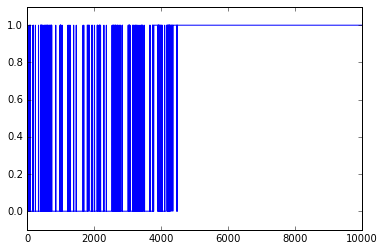

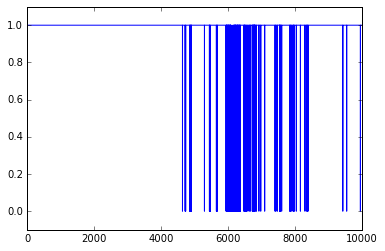

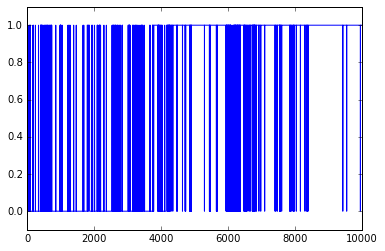

In [9]:
if temp != -1:
    glu63 = topology.select('protein and resSeq 63 and element O')#not backbone and element O and not name H and not name O')
    glu62 = topology.select('protein and resSeq 62 and element O')#not backbone and element O and not name H and not name O')
    GTP = topology.select('(resname GTP and element O) or element Mg')
    water = topology.select('water and element O')

    print('computing glu63_water')
    glu63_water = md.compute_neighbors(traj=trj,cutoff = 0.31, query_indices=glu63, haystack_indices = water) 
    print('computing glu62_water')
    glu62_water = md.compute_neighbors(traj=trj,cutoff = 0.31, query_indices=glu62, haystack_indices = water) 
    print('computing GTP_water')
    GTP_water = md.compute_neighbors(traj=trj,cutoff = 0.31, query_indices=GTP, haystack_indices = water) 

    glu63_water_residues = []
    glu62_water_residues = []
    GTP_water_residues = []
    for i,e in enumerate(glu63_water):
        temp = [topology.atom(x).residue for x in e]
        glu63_water_residues.append(temp)
    for i,e in enumerate(glu62_water):
        temp = [topology.atom(x).residue for x in e]
        glu62_water_residues.append(temp)
    for i,e in enumerate(GTP_water):
        temp = [topology.atom(x).residue for x in e]
        GTP_water_residues.append(temp)

    glu63_results = np.zeros(len(glu63_water_residues))
    glu62_results = np.zeros(len(glu62_water_residues))
    prev = 0
    for i, e in enumerate(glu63_water_residues):
        if set(e).isdisjoint(GTP_water_residues[i]) == True:
            glu63_results[i] = 1
        else:
            temp = 0
            for j in e:
                if j in GTP_water_residues[i]:
                    temp = 1
            if temp == 0:
                print('somtehing is wrong')

    for i, e in enumerate(glu62_water_residues):
        if set(e).isdisjoint(GTP_water_residues[i]) == True:
            glu62_results[i] = 1

    combined_results = []
    for i, e in enumerate(glu62_results):
        combined_results.append(min([e,glu63_results[i]]))

    for i in [glu63_results, glu62_results, combined_results]:
        y = i
        x = range(len(i))
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(x, y)
        ax.set_ylim(-0.1,1.1)
    for i in range(len(results_dist[0])):
        if results_dist[0][i] >0.6 \
        and results_dist[2][i] > 0.8 and results_dist[3][i] > 1.0\
        and results_dist[4][i] > 1.0 and results_COM[i] > 1.9 \
        and combined_results[i] == 1: 
            print(i)